#Consigna

Utilizaremos un conjunto de datos que nos interese trabajar y mediante la
implementación de los algoritmos Árbol de Decisión y K-NN, evaluaremos y
compararemos la precisión de los clasificadores generados.

Esta tarea nos permitirá no solo poner a prueba nuestras habilidades en la construcción de modelos, sino también comprender cómo diferentes enfoques de aprendizaje automático pueden tener un impacto significativo en los resultados.

Al finalizar la actividad, analizaremos detenidamente los resultados obtenidos, lo que nos proporcionará una visión más profunda de las fortalezas y debilidades de cada algoritmo en el contexto de la clasificación de datos, y nos ayudará a tomar decisiones informadas sobre su implementación en problemas del mundo real.


En el espacio de entrega de tarea deberás colocar el link a tu repositorio GIT donde se encuentren los modelos generados y un pequeño informe comparando los resultados obtenidos (esto puede estar en el archivo readme).

#Solucion

**Titanic - Machine Learning from Disaster**

[Link al Dataset](https://www.kaggle.com/competitions/titanic/overview)

## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns


# Aumentar ancho de visualizacion
pd.set_option('display.width', 1000)

## Carga del DataFrame
Los dataset ya estaban divididos en Train y Test (68% Train, 32% Test)
El dataset test, ya elimino la variable objetivo `Survived`

In [2]:
df_csv_train = pd.read_csv("/content/train.csv", encoding = "ISO-8859-1")
df_csv_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_csv_test = pd.read_csv("/content/test.csv", encoding = "ISO-8859-1")
df_csv_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Titanic Dataset - Data Dictionary

| Variable   | Definition                       | Key                                  |
|-----------|---------------------------------|-------------------------------------|
| survival  | Survival                         | 0 = No, 1 = Yes                     |
| pclass    | Ticket class                     | 1 = 1st, 2 = 2nd, 3 = 3rd          |
| sex       | Sex                              |                                     |
| age       | Age in years                     |                                     |
| sibsp     | # of siblings / spouses aboard   |                                     |
| parch     | # of parents / children aboard   |                                     |
| ticket    | Ticket number                    |                                     |
| fare      | Passenger fare                   |                                     |
| cabin     | Cabin number                     |                                     |
| embarked  | Port of Embarkation              | C = Cherbourg, Q = Queenstown, S = Southampton |
|- |-|-|




### Revisión del DataFrame
- Revisar dimensiones (df.shape)
- Ver tipos de datos (df.dtypes)
- Verificar nulos (df.isnull().sum()).


In [4]:
print("Cantidad de (filas) , (columnas):\n", df_csv_train.shape)
print(df_csv_train.info())


Cantidad de (filas) , (columnas):
 (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("Cantidad de (filas) , (columnas):\n", df_csv_test.shape)

print(df_csv_test.info())



Cantidad de (filas) , (columnas):
 (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [6]:
# Train
df_csv_train = df_csv_train.dropna(subset=["Age"])
# Test
df_csv_test = df_csv_test.dropna(subset=["Age"])

## Análisis exploratorio (EDA)
- Estadísticas descriptivas (df.describe()).
- Visualización de distribución de variables (histogramas, boxplots).
- Identificación de outliers.

In [7]:
# Convertir columna "sex" a variable discreta.
df_csv_train["Sex"] = df_csv_train["Sex"].map({"male": 0, "female": 1})
df_csv_test["Sex"] = df_csv_test["Sex"].map({"male": 0, "female": 1})

/tmp/ipython-input-1579593630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_train["Sex"] = df_csv_train["Sex"].map({"male": 0, "female": 1})
/tmp/ipython-input-1579593630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_test["Sex"] = df_csv_test["Sex"].map({"male": 0, "female": 1})


In [8]:
# Creo una nueva columna para determinar el tamaño del grupo familiar.
for df in [df_csv_train]:
    df_csv_train['FamilySize'] = df_csv_train['SibSp'] + df_csv_train['Parch'] + 1
for df in [df_csv_test]:
    df_csv_train['FamilySize'] = df_csv_train['SibSp'] + df_csv_train['Parch'] + 1

print(df_csv_train)
print(df_csv_test)


     PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  FamilySize
0              1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S           2
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C           2
2              3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S           1
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S           2
4              5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500   NaN        S           1
..        

/tmp/ipython-input-3550931701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_train['FamilySize'] = df_csv_train['SibSp'] + df_csv_train['Parch'] + 1
/tmp/ipython-input-3550931701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_train['FamilySize'] = df_csv_train['SibSp'] + df_csv_train['Parch'] + 1


In [9]:
print(df_csv_train.describe())
print(df_csv_test.describe())


       PassengerId    Survived      Pclass         Sex         Age       SibSp       Parch        Fare  FamilySize
count   714.000000  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean    448.582633    0.406162    2.236695    0.365546   29.699118    0.512605    0.431373   34.694514    1.943978
std     259.119524    0.491460    0.838250    0.481921   14.526497    0.929783    0.853289   52.918930    1.483788
min       1.000000    0.000000    1.000000    0.000000    0.420000    0.000000    0.000000    0.000000    1.000000
25%     222.250000    0.000000    1.000000    0.000000   20.125000    0.000000    0.000000    8.050000    1.000000
50%     445.000000    0.000000    2.000000    0.000000   28.000000    0.000000    0.000000   15.741700    1.000000
75%     677.750000    1.000000    3.000000    1.000000   38.000000    1.000000    1.000000   33.375000    2.000000
max     891.000000    1.000000    3.000000    1.000000   80.000000    5.000000  

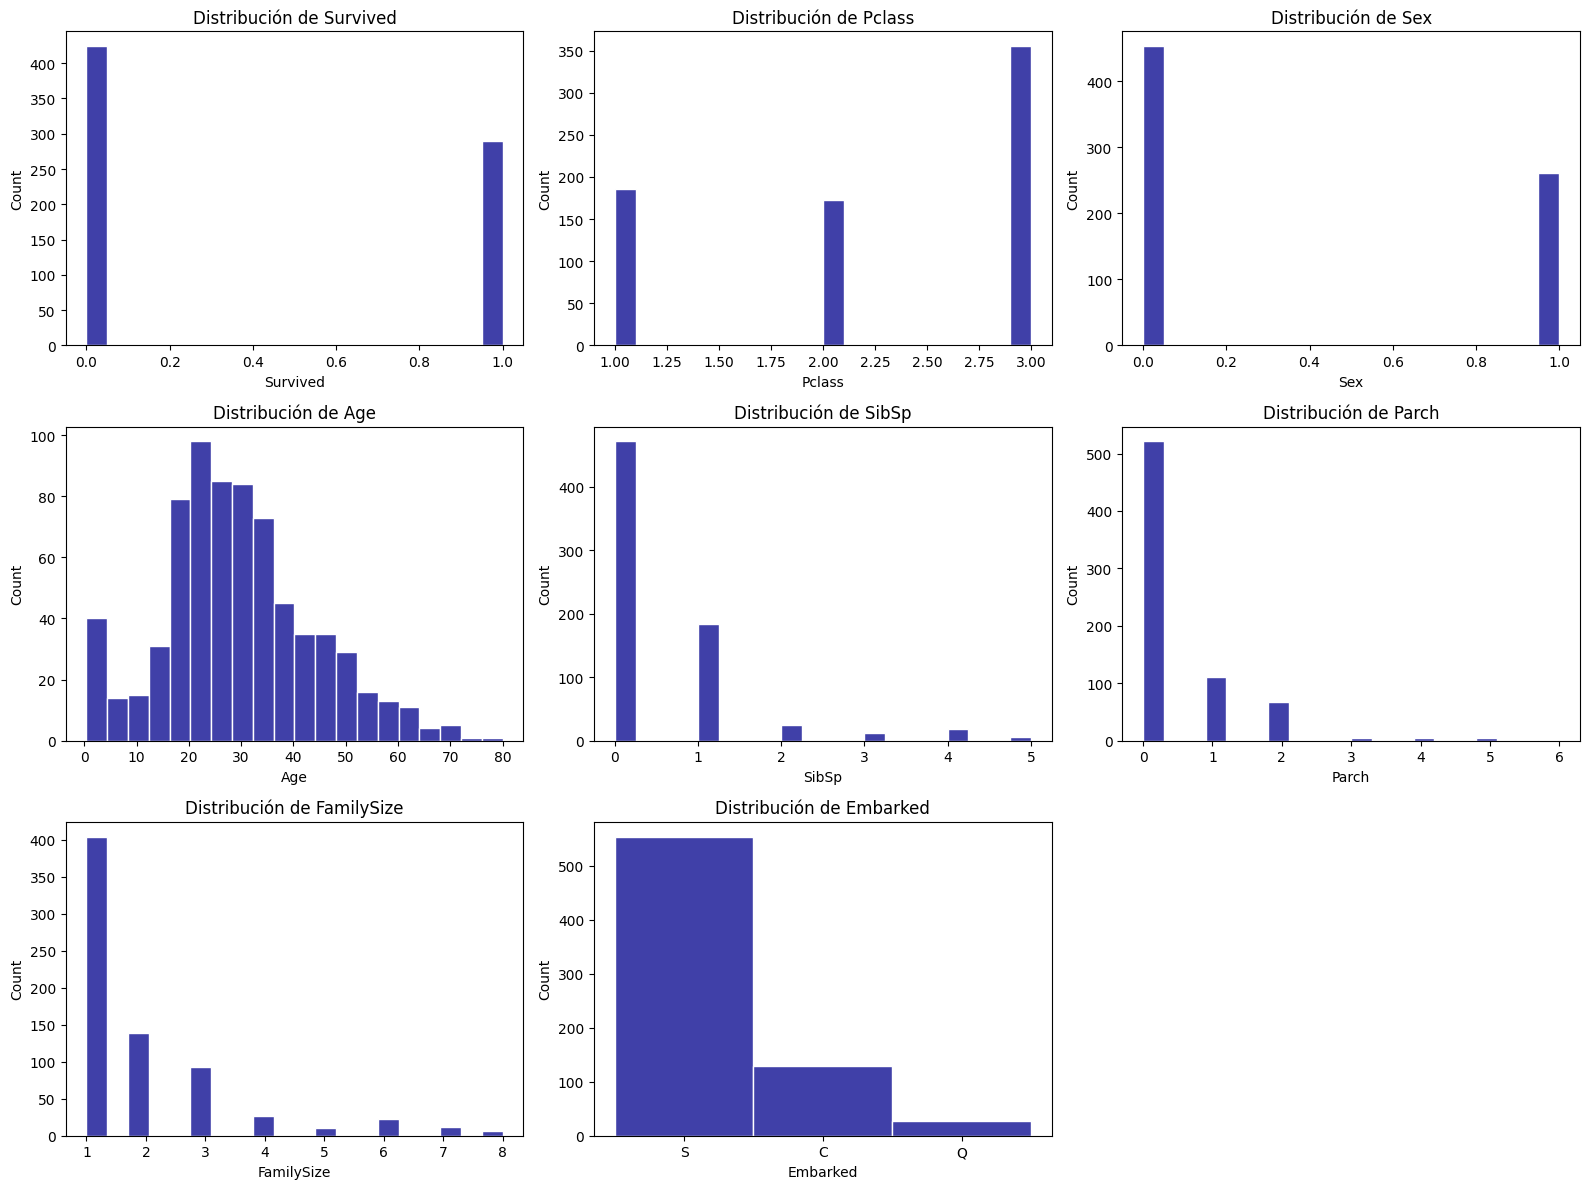

In [10]:
columnas_hist = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "FamilySize", "Embarked"]
plt.figure(figsize=(16, 12))
for i, col in enumerate(columnas_hist, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_csv_train, x=col, bins=20, kde=False, color="darkblue", edgecolor="white")
    plt.title(f"Distribución de {col}", fontsize=12)

plt.tight_layout()
plt.show()

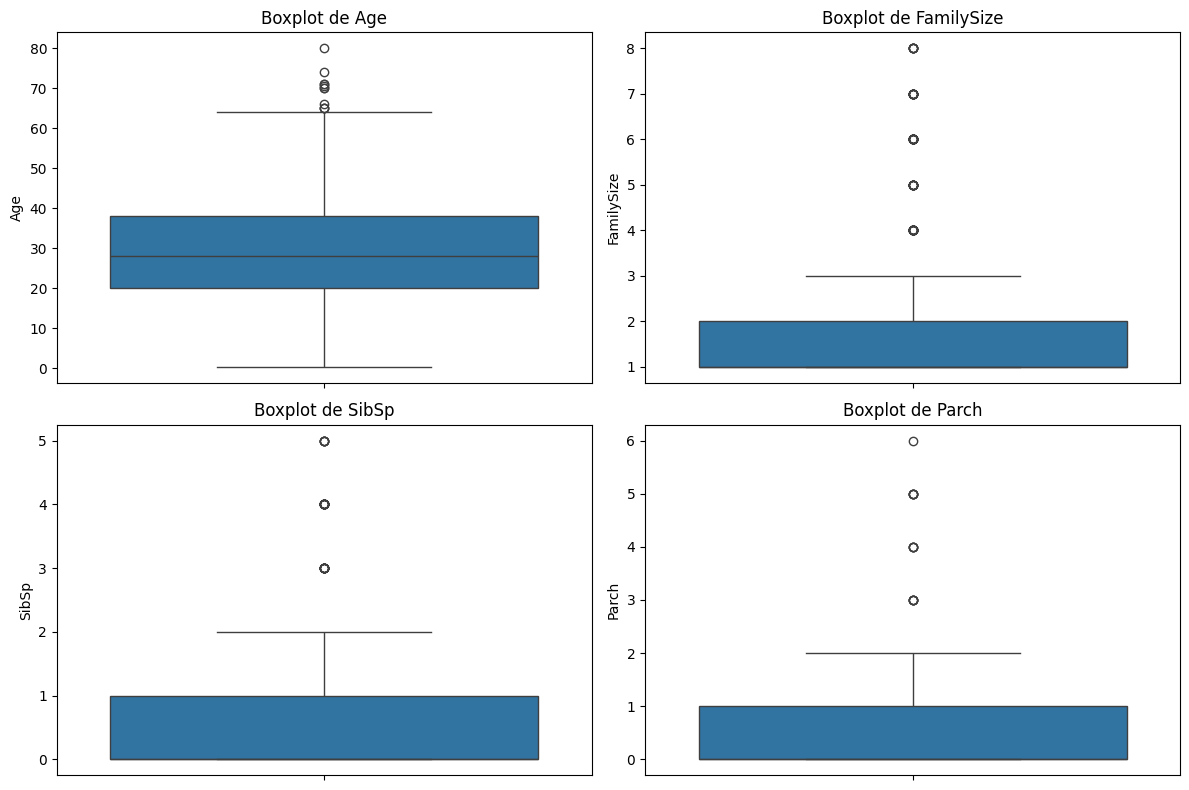

In [11]:
# Lista de columnas para boxplots
columnas_box = ["Age", "FamilySize", "SibSp", "Parch"]
plt.figure(figsize=(12, 8))

for i, col in enumerate(columnas_box, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_csv_train, y=col)
    plt.title(f"Boxplot de {col}", fontsize=12)


plt.tight_layout()
plt.show()



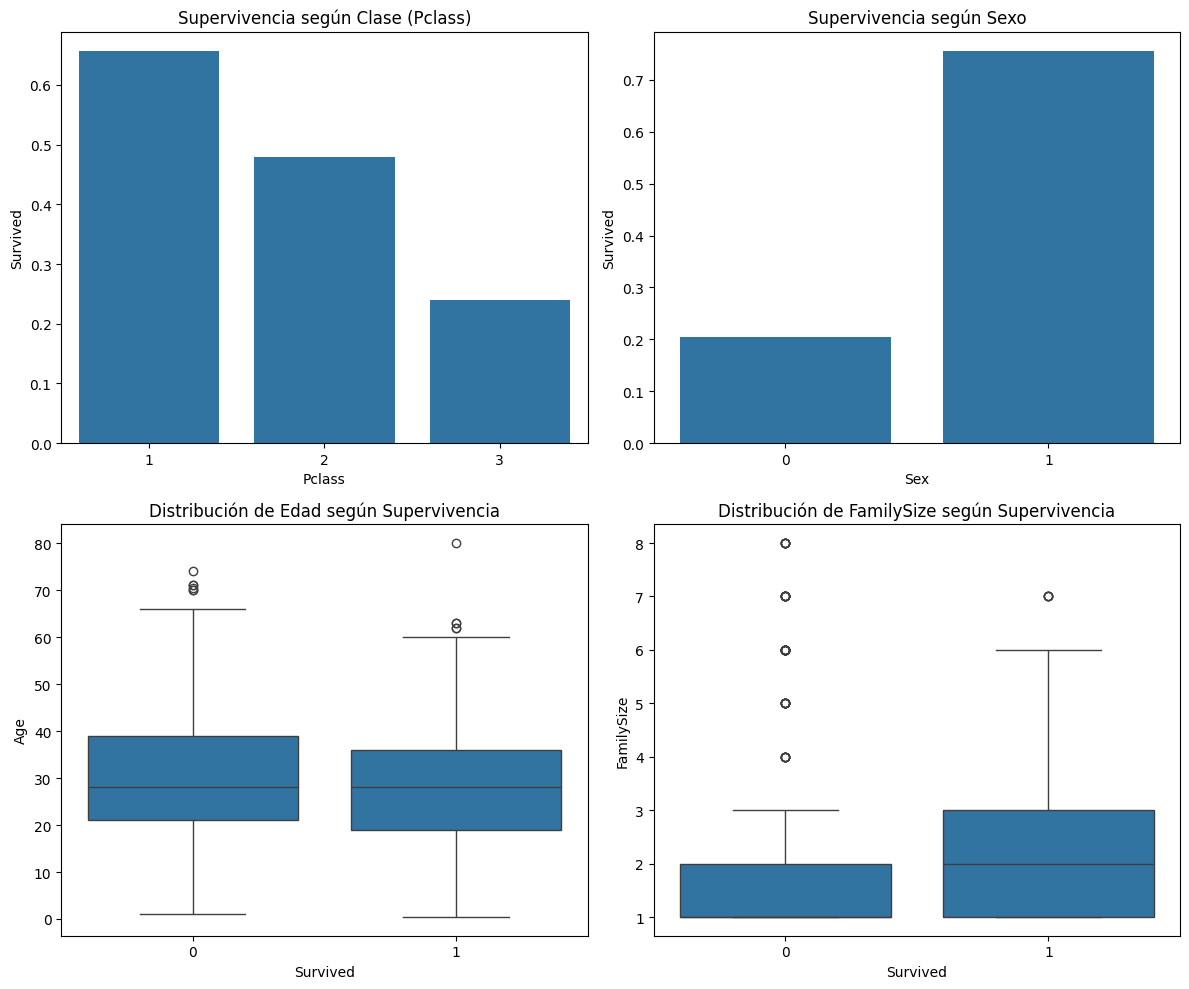

Survival	0 = No, 1 = Yes
pclass		Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd


In [12]:
plt.figure(figsize=(12, 10))

# 1. Survived vs Pclass (categórica)
plt.subplot(2, 2, 1)
sns.barplot(data=df_csv_train, x="Pclass", y="Survived", errorbar=None)
plt.title("Supervivencia según Clase (Pclass)")

# 2. Survived vs Sex (categórica)
plt.subplot(2, 2, 2)
sns.barplot(data=df_csv_train, x="Sex", y="Survived", errorbar=None)
plt.title("Supervivencia según Sexo")

# 3. Survived vs Age (numérica → boxplot)
plt.subplot(2, 2, 3)
sns.boxplot(data=df_csv_train, x="Survived", y="Age")
plt.title("Distribución de Edad según Supervivencia")

# 4. Survived vs FamilySize (numérica → boxplot)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_csv_train, x="Survived", y="FamilySize")
plt.title("Distribución de FamilySize según Supervivencia")

plt.tight_layout()
plt.show()
print("Survival	0 = No, 1 = Yes\npclass		Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd")

### Correlacion entre las variables

In [13]:
variables_correlacion = ["Survived", "Pclass", "Sex", "Age", "FamilySize","SibSp", "Parch"]

# Calculamos la matriz de correlación
df_csv_train[variables_correlacion].corr()

,Survived,Pclass,Sex,Age,FamilySize,SibSp,Parch
Survived,1.000000,-0.359653,0.538826,-0.077221,0.042787,-0.017358,0.093317
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.056909,0.067247,0.025683
Sex,0.538826,-0.155460,1.000000,-0.093254,0.207165,0.103950,0.246972
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.301914,-0.308247,-0.189119
FamilySize,0.042787,0.056909,0.207165,-0.301914,1.000000,0.847354,0.815588
SibSp,-0.017358,0.067247,0.103950,-0.308247,0.847354,1.000000,0.383820
Parch,0.093317,0.025683,0.246972,-0.189119,0.815588,0.383820,1.000000


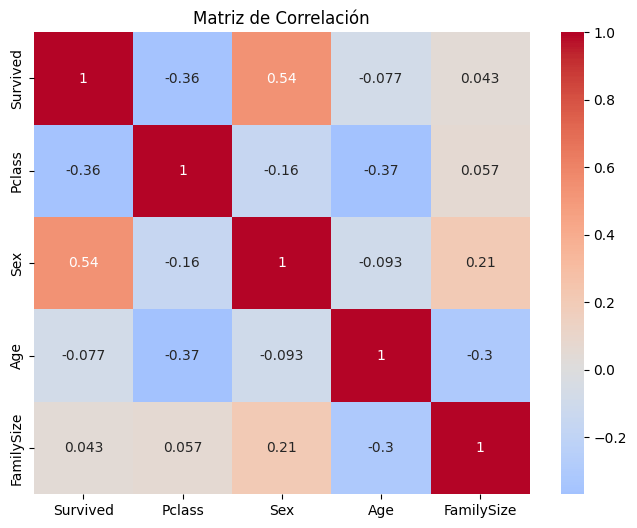

In [14]:
# Seleccionamos solo las columnas que queremos analizar
variables_correlacion = ["Survived", "Pclass", "Sex", "Age", "FamilySize"]

# Calculamos la matriz de correlación
matrix_correlacion = df_csv_train[variables_correlacion].corr()

# Heatmap de correlación
plt.figure(figsize=(8,6))
sns.heatmap(matrix_correlacion, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()


#### Interpretacion
**Sexo** (0=male, 1=female) → 0.54: fuerte correlación positiva → ser mujer aumentó claramente la probabilidad de sobrevivir.

**Clase** (Pclass) → -0.33: correlación negativa moderada → pasajeros de clase alta (1ª) sobrevivieron más que los de clases bajas.

**Edad** → -0.07: correlación débil y negativa → los más jóvenes tendieron a sobrevivir algo más, pero la relación no es fuerte.

**FamilySize** → 0.016: prácticamente nula → el tamaño de la familia a bordo no influyó demasiado en la supervivencia.

In [15]:
# proporción supervivencia
print(df_csv_train[['Survived']].value_counts(normalize=True),"\n")

Survived
0           0.593838
1           0.406162
Name: proportion, dtype: float64 



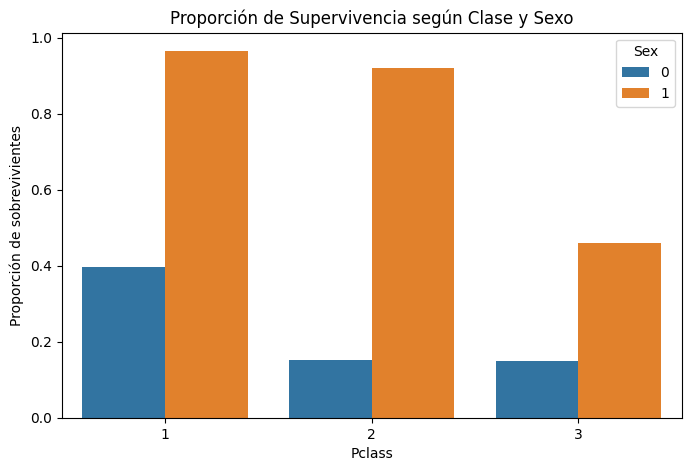

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_csv_train, x="Pclass", y="Survived", hue="Sex", errorbar=None)
plt.title("Proporción de Supervivencia según Clase y Sexo")
plt.ylabel("Proporción de sobrevivientes")
plt.show()


#### Interpretación del Análisis Exploratorio (EDA)

El conjunto de datos *Titanic* incluye información sobre los pasajeros, abarcando variables sociodemográficas y del viaje, con el objetivo de predecir la supervivencia (**Survived**).

Al examinar los datos se identifican patrones importantes:

- **Clase del pasajero (Pclass):** existe una relación clara entre la clase social y la probabilidad de sobrevivir. Los pasajeros de primera clase presentan una tasa de supervivencia significativamente mayor que los de tercera clase.  
- **Sexo (Sex):** el análisis muestra que las mujeres tuvieron una tasa de supervivencia mucho más alta que los hombres.

El estudio de la matriz de correlaciones respalda estos hallazgos:

- **Sex** es la variable con mayor correlación positiva con la supervivencia, seguida por **Fare** y **Pclass**
- La correlación de **Age** con la supervivencia es débil, indicando que no es tan determinante como la clase o el género del pasajero.  



## Limpieza del dataset
Luego del analisis de la distribucion de las variables, los boxplot y la correlacion, elimino las variables que no aportan informacion relevante fuerte para el entrenamiento. (`PassengerId`,`Name`,`Ticket`, `Embarked`,`Fare` y `Cabin`)
Nos quedamos solo con las columnas `Survived` `Pclass`  `Sex`   `Age`  `FamilySize`

In [17]:
columnas_eliminar = ['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Embarked','Fare' ]
df_csv_train = df_csv_train.drop(columns=columnas_eliminar)
df_csv_test = df_csv_test.drop(columns=columnas_eliminar)
print(df_csv_train)
print(df_csv_test)

     Survived  Pclass  Sex   Age  FamilySize
0           0       3    0  22.0           2
1           1       1    1  38.0           2
2           1       3    1  26.0           1
3           1       1    1  35.0           2
4           0       3    0  35.0           1
..        ...     ...  ...   ...         ...
885         0       3    1  39.0           6
886         0       2    0  27.0           1
887         1       1    1  19.0           1
889         1       1    0  26.0           1
890         0       3    0  32.0           1

[714 rows x 5 columns]
     Pclass  Sex   Age
0         3    0  34.5
1         3    1  47.0
2         2    0  62.0
3         3    0  27.0
4         3    1  22.0
..      ...  ...   ...
409       3    1   3.0
411       1    1  37.0
412       3    1  28.0
414       1    1  39.0
415       3    0  38.5

[332 rows x 3 columns]


## Entrenamiento


El dataset ya estaba dividido en Train y Test.
Esto genera un problema por que el dataset de prueba no cuenta con la columna survived. Por ello divido el dataset `train` para realizar el entrenamiento y testeo.
Luego verificaremos las metricas con `y_train` y haremos las predicciones con `test`
Ademas hay que realizar el escalado evitando que una característica “pese” más que otra solo por sus unidades o rango.

In [18]:
X = df_csv_train.drop('Survived', axis=1)
y = df_csv_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")



Tamaño del conjunto de entrenamiento: 499
Tamaño del conjunto de prueba: 215


## K-Nearest Neighbors (KNN)

#### Escalado

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Modelo 1 `n_neighbors=5` - `weights='distance'`

In [20]:
knnV1 = KNeighborsClassifier(n_neighbors=5, weights='distance')

#Entrenamiento (dataset de prueba)
knnV1.fit(X_train_scaled, y_train)

#Prediccion (dataset de entrenamiento)
y_pred_knnV1 = knnV1.predict(X_test_scaled)

#Resultados
print("Métricas KNN:")
print(classification_report(y_test, y_pred_knnV1))

Métricas KNN:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       126
           1       0.77      0.69      0.73        89

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.79      0.79      0.78       215



Accuracy KNN: 0.786046511627907


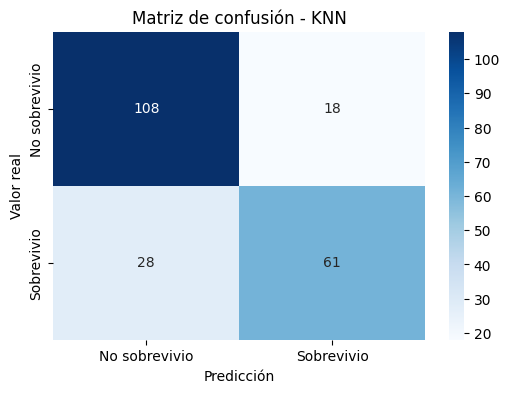

In [21]:
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knnV1))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knnV1), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivio", "Sobrevivio"], yticklabels=["No sobrevivio", "Sobrevivio"])
plt.title("Matriz de confusión - KNN")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()


#### Modelo 2 `n_neighbors=5` - `weights='uniform'`

In [22]:
knnV2 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Entrenamiento (dataset de prueba)
knnV2.fit(X_train_scaled, y_train)

#Prediccion (dataset de entrenamiento)
y_pred_knnV2 = knnV2.predict(X_test_scaled)

#Resultados
print("Métricas KNN:")
print(classification_report(y_test, y_pred_knnV2))


Métricas KNN:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       126
           1       0.79      0.70      0.74        89

    accuracy                           0.80       215
   macro avg       0.80      0.78      0.79       215
weighted avg       0.80      0.80      0.80       215



Accuracy KNN: 0.8


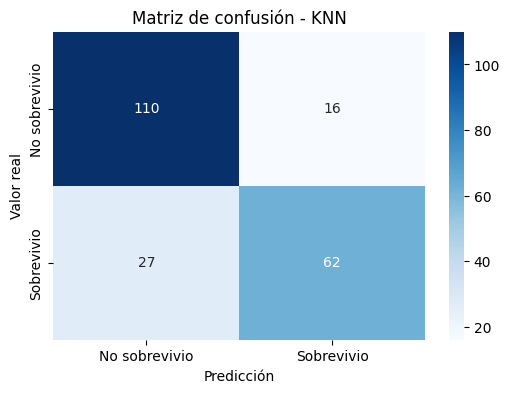

In [23]:
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knnV2))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knnV2), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivio", "Sobrevivio"], yticklabels=["No sobrevivio", "Sobrevivio"])
plt.title("Matriz de confusión - KNN")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()

#### Buscando el mejor valor **k**



Mejor valor de k: 5
Mejor accuracy: 0.8000


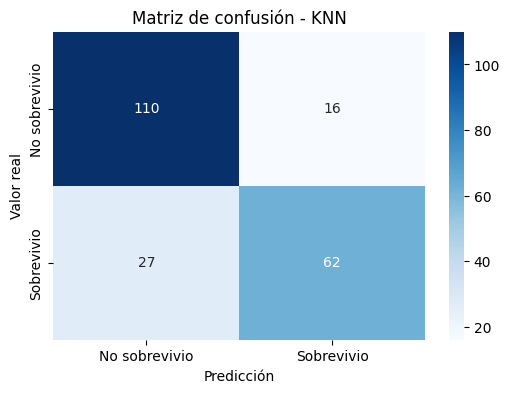

In [24]:
#Probar diferentes valores de k
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_temp.fit(X_train_scaled, y_train)

    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# Encontrar el mejor k
best_k = k_values[np.argmax(test_scores)]
best_score = max(test_scores)

# Entrenar modelo final con el mejor k
knn_final = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
knn_final.fit(X_train_scaled, y_train)
y_pred_knn_final = knn_final.predict(X_test_scaled)

print(f"\nMejor valor de k: {best_k}")
print(f"Mejor accuracy: {best_score:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_final), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivio", "Sobrevivio"], yticklabels=["No sobrevivio", "Sobrevivio"])
plt.title("Matriz de confusión - KNN")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()



#### EVALUACIÓN DE MÉTRICAS

##### Modelo K-Nearest Neighbors (KNN)

---

#### RESUMEN
El modelo KNN entrenado para predecir la supervivencia en el Titanic alcanzó un **Accuracy del 80%** sobre el conjunto de prueba (215 instancias). El modelo demuestra un rendimiento equilibrado, con mejor desempeño en la detección de pasajeros que no sobrevivieron (clase 0) en comparación con los que sí sobrevivieron (clase 1).


---

## MÉTRICAS OBTENIDAS

### Tabla de Métricas por Clase

| Métrica | Clase 0 (No sobrevivió) | Clase 1 (Sobrevivió) |
|---------|-------------------------|----------------------|
| **Precision** | 0.80 (80%) | 0.79 (79%) |
| **Recall** | 0.87 (87%) | 0.70 (70%) |
| **F1-Score** | 0.84 (84%) | 0.74 (74%) |
| **Support** | 126 casos | 89 casos |

### Métricas Globales

- **Accuracy**: 0.80 (80%)
- **Macro Average**: 0.79
- **Weighted Average**: 0.80

---

## ANÁLISIS DETALLADO POR MÉTRICA

### **Accuracy (Exactitud) - 80%**

**Definición**: Proporción de predicciones correctas sobre el total de predicciones.

**Interpretación**:
- El modelo predice correctamente el 80% de los casos totales (172 de 215 instancias).
- Considero que este es un **buen rendimiento** considerando la complejidad del problema y las variables disponibles.



### **Precision (Precisión)**

**Definición**: De todos los casos que el modelo predijo como positivos, ¿cuántos realmente lo son?

#### Clase 0 (No sobrevivió): 80%
- De cada 100 pasajeros que el modelo predice como "no sobrevivieron", 80 efectivamente no sobrevivieron.
- **20% son falsos positivos**: el modelo predijo incorrectamente que no sobrevivirían cuando en realidad sí lo hicieron.

#### Clase 1 (Sobrevivió): 79%
- De cada 100 pasajeros que el modelo predice como "sobrevivieron", 79 efectivamente sobrevivieron.
- **21% son falsos positivos**: el modelo predijo incorrectamente que sobrevivirían cuando en realidad no lo hicieron.

**Conclusión**: Ambas clases tienen precisión similar. El modelo es **confiable** cuando hace una predicción positiva.



### **Recall (Sensibilidad)**

**Definición**: De todos los casos positivos reales, ¿cuántos fue capaz de detectar el modelo?

#### Clase 0 (No sobrevivió): 87%
- El modelo **detecta el 87%** de los pasajeros que realmente no sobrevivieron.
- **13% son falsos negativos**: pasajeros que no sobrevivieron pero el modelo predijo que sí.
- Este es un **recall excelente**.

#### Clase 1 (Sobrevivió): 70%
- El modelo **detecta solo el 70%** de los pasajeros que realmente sobrevivieron.
- **30% son falsos negativos**: pasajeros que sobrevivieron pero el modelo predijo que no.
- Este recall es **moderado y mejorable**.

**Conclusión**: El modelo es **mejor identificando a los que no sobrevivieron** que a los que sí sobrevivieron. Existe un desbalance en la capacidad de detección entre clases.


### **F1-Score**

**Definición**: Media armónica entre Precision y Recall. Balancea ambas métricas.

#### Clase 0 (No sobrevivió): 0.84
- **Rendimiento muy bueno** para esta clase.
- Indica un balance sólido entre precision y recall.

#### Clase 1 (Sobrevivió): 0.74
- **Rendimiento bueno** pero inferior a la clase 0.
- La diferencia se debe principalmente al recall más bajo (70%).

**Conclusión**: El F1-Score revela que el modelo tiene **mejor desempeño global en la clase 0** que en la clase 1.

---

## MATRIZ DE CONFUSIÓN

**Interpretación**:
- **Verdaderos Negativos (110)**: Correctamente identificó que no sobrevivieron
- **Falsos Positivos (16)**: Predijo que sobrevivieron pero no lo hicieron
- **Falsos Negativos (27)**: Predijo que no sobrevivieron pero sí lo hicieron ⚠️
- **Verdaderos Positivos (62)**: Correctamente identificó que sobrevivieron

---

## ANÁLISIS COMPARATIVO

### Desbalance de Clases
- **Clase 0**: 126 casos (58.6% del total)
- **Clase 1**: 89 casos (41.4% del total)

Existe un **leve desbalance** hacia la clase 0, lo cual puede explicar parcialmente por qué el modelo tiene mejor desempeño en esta clase.

### Fortalezas del Modelo
- **Accuracy global sólida** (80%)

- **Excelente Recall en clase 0** (87%)

- **Precision balanceada** entre ambas clases (~80%)

- **F1-Score clase 0 muy bueno** (0.84)

### Debilidades del Modelo
- **Recall bajo en clase 1** (70%)

- **27 falsos negativos** (personas que sobrevivieron pero el modelo dijo que no)

- **F1-Score clase 1 mejorable** (0.74)

---

## CONCLUSIONES

1. **Rendimiento General**: El modelo KNN logra un accuracy del 80%, lo cual es **bueno** para un problema de clasificación binaria con 4 características.

2. **Sesgo hacia Clase 0**: El modelo es significativamente mejor detectando pasajeros que no sobrevivieron (Recall 87%) que los que sí sobrevivieron (Recall 70%).

3. **Confiabilidad**: Cuando el modelo hace una predicción (sea positiva o negativa), tiene ~80% de probabilidad de estar correcto (Precision).

4. **Balance Precision-Recall**: El F1-Score indica que la clase 0 tiene mejor balance (0.84) que la clase 1 (0.74).


## Árbol de Decisión

### Modelo 1 - `criterion='gini'`

##### Buscar el mejor `max_depth`



PROBANDO max_depth
max_depth=2            → Train: 0.8096, Test: 0.7860
max_depth=3            → Train: 0.8357, Test: 0.7628
max_depth=4            → Train: 0.8537, Test: 0.7767
max_depth=5            → Train: 0.8637, Test: 0.7674
max_depth=6            → Train: 0.8758, Test: 0.7721
max_depth=7            → Train: 0.8958, Test: 0.7628
max_depth=8            → Train: 0.9098, Test: 0.7674
max_depth=10           → Train: 0.9339, Test: 0.7814
max_depth=15           → Train: 0.9459, Test: 0.7814
max_depth=20           → Train: 0.9459, Test: 0.7814

Mejor max_depth: 2
Mejor Test Accuracy: 0.7860


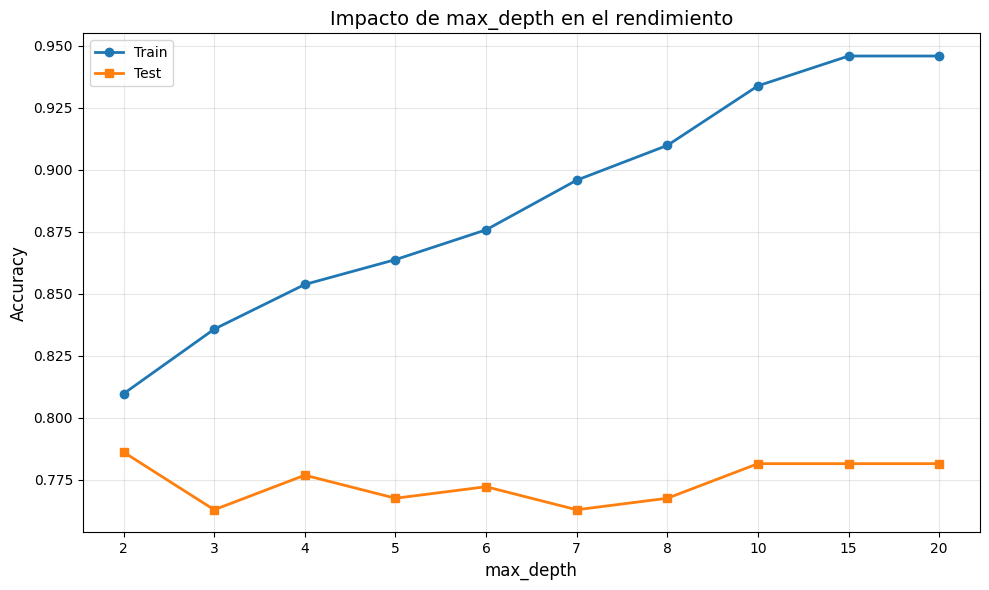

In [25]:
# Probar diferentes profundidades
depths = [2, 3, 4, 5, 6, 7, 8, 10, 15, 20]
train_scores = []
test_scores = []

print("PROBANDO max_depth")

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='gini')
    dt.fit(X_train, y_train)

    depth_str = str(depth)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

    print(f"max_depth={depth_str:12s} → Train: {train_scores[-1]:.4f}, Test: {test_scores[-1]:.4f}")


# Mejor profundidad
best_depth_g = depths[test_scores.index(max(test_scores))]
print(f"\nMejor max_depth: {best_depth_g}")
print(f"Mejor Test Accuracy: {max(test_scores):.4f}")

# Visualizar
plt.figure(figsize=(10, 6))
depth_labels = [str(d) for d in depths]
plt.plot(depth_labels, train_scores, 'o-', label='Train', linewidth=2)
plt.plot(depth_labels, test_scores, 's-', label='Test', linewidth=2)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Impacto de max_depth en el rendimiento', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### Buscar el mejor `min_samples_split`

In [26]:
# Después de encontrar el mejor max_depth, probamos buscar el mejor min_samples_split
best_depth = 2

min_samples_values = [2, 5, 10, 20, 30, 50]
test_scores_ms = []

print("PROBANDO min_samples_split")

for min_samp in min_samples_values:
    dt = DecisionTreeClassifier(
        max_depth=best_depth,
        min_samples_split=min_samp,
        random_state=42,
        criterion='gini'
    )
    dt.fit(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    test_scores_ms.append(test_score)
    print(f"min_samples_split={min_samp:3d} → Test Accuracy: {test_scores_ms[-1]:.4f}")


# Mejor valor
best_min_split_g = min_samples_values[test_scores_ms.index(max(test_scores_ms))]
print(f"\nMejor min_samples_split: {best_min_split_g}")
print(f"Mejor Test Accuracy: {max(test_scores_ms):.4f}")


PROBANDO min_samples_split
min_samples_split=  2 → Test Accuracy: 0.7860
min_samples_split=  5 → Test Accuracy: 0.7860
min_samples_split= 10 → Test Accuracy: 0.7860
min_samples_split= 20 → Test Accuracy: 0.7860
min_samples_split= 30 → Test Accuracy: 0.7860
min_samples_split= 50 → Test Accuracy: 0.7860

Mejor min_samples_split: 2
Mejor Test Accuracy: 0.7860


#### Buscar el mejor `min_samples_leaf`

PROBANDO min_samples_leaf
min_samples_leaf=  1 → Test Accuracy: 0.7860
min_samples_leaf=  2 → Test Accuracy: 0.7860
min_samples_leaf=  5 → Test Accuracy: 0.7860
min_samples_leaf= 10 → Test Accuracy: 0.7860
min_samples_leaf= 15 → Test Accuracy: 0.7907
min_samples_leaf= 20 → Test Accuracy: 0.7907
min_samples_leaf= 30 → Test Accuracy: 0.7814

Mejor min_samples_leaf: 15
Mejor Test Accuracy: 0.7907


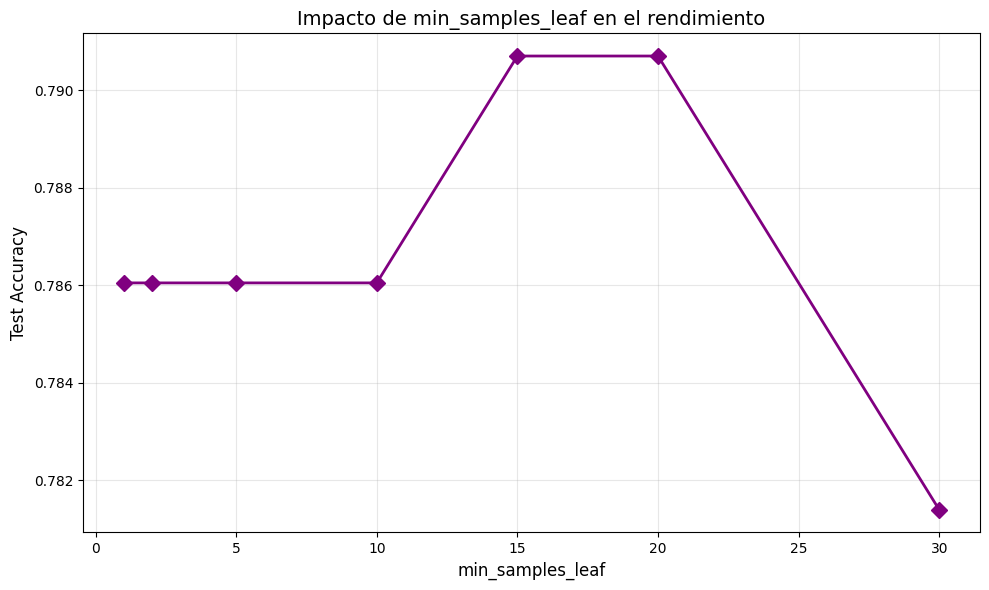

In [27]:
# Después de encontrar el mejor max_depth y min_samples_split
best_depth = 2
best_min_samples_split = 2

# Probar diferentes valores de min_samples_leaf
min_samples_leaf_values = [1, 2, 5, 10, 15, 20, 30]
test_scores_msl = []


print("PROBANDO min_samples_leaf")


for min_leaf in min_samples_leaf_values:
    dt = DecisionTreeClassifier(
        max_depth=best_depth,
        min_samples_split=best_min_samples_split,
        min_samples_leaf=min_leaf,
        random_state=42,
        criterion='gini'
    )
    dt.fit(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    test_scores_msl.append(test_score)
    print(f"min_samples_leaf={min_leaf:3d} → Test Accuracy: {test_score:.4f}")

# Mejor valor
best_min_leaf_g = min_samples_leaf_values[test_scores_msl.index(max(test_scores_msl))]
print(f"\nMejor min_samples_leaf: {best_min_leaf_g}")
print(f"Mejor Test Accuracy: {max(test_scores_msl):.4f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, test_scores_msl, 'D-',
         linewidth=2, markersize=8, color='purple')
plt.xlabel('min_samples_leaf', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Impacto de min_samples_leaf en el rendimiento', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Modelo 2 - `criterion='Entropy'`

##### Buscar el mejor `max_depth`



PROBANDO max_depth
max_depth=2            → Train: 0.8096, Test: 0.7860
max_depth=3            → Train: 0.8357, Test: 0.7628
max_depth=4            → Train: 0.8537, Test: 0.7767
max_depth=5            → Train: 0.8637, Test: 0.7628
max_depth=6            → Train: 0.8737, Test: 0.7767
max_depth=7            → Train: 0.8898, Test: 0.7767
max_depth=8            → Train: 0.9038, Test: 0.7674
max_depth=9            → Train: 0.9118, Test: 0.7628
max_depth=10           → Train: 0.9218, Test: 0.7767

Mejor max_depth: 2
Mejor Test Accuracy: 0.7860


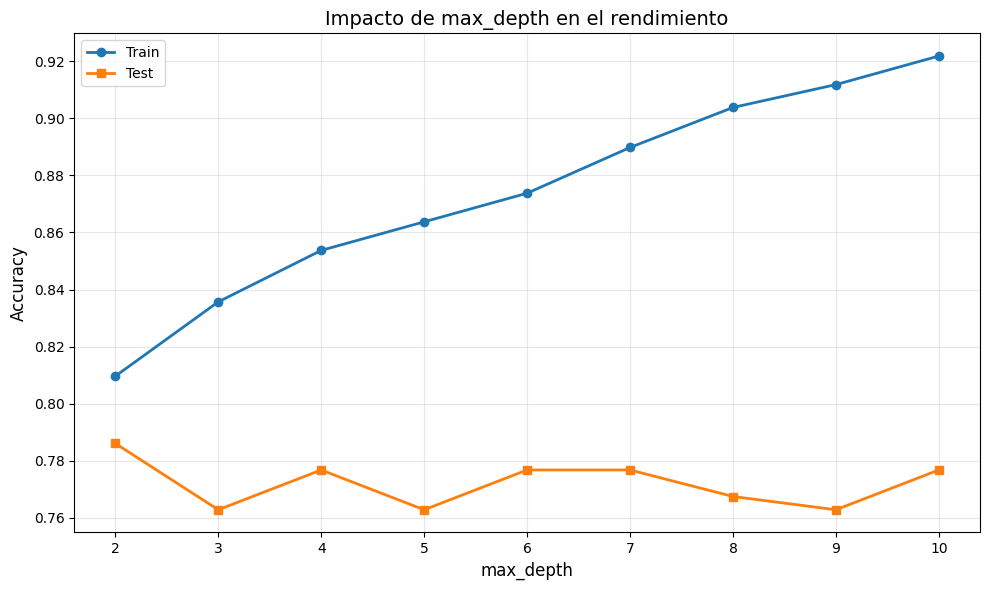

In [28]:
# Probar diferentes profundidades
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores = []
test_scores = []

print("PROBANDO max_depth")

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='entropy')
    dt.fit(X_train, y_train)

    depth_str = str(depth)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

    print(f"max_depth={depth_str:12s} → Train: {train_scores[-1]:.4f}, Test: {test_scores[-1]:.4f}")


# Mejor profundidad
best_depth_e = depths[test_scores.index(max(test_scores))]
print(f"\nMejor max_depth: {best_depth_e}")
print(f"Mejor Test Accuracy: {max(test_scores):.4f}")


# Visualizar
plt.figure(figsize=(10, 6))
depth_labels = [str(d) for d in depths]
plt.plot(depth_labels, train_scores, 'o-', label='Train', linewidth=2)
plt.plot(depth_labels, test_scores, 's-', label='Test', linewidth=2)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Impacto de max_depth en el rendimiento', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



##### Buscar el mejor `min_samples_split`

In [29]:
# Después de encontrar el mejor max_depth, probamos buscar el mejor min_samples_split
best_depth = best_depth_e

min_samples_values = [2, 5, 10, 20, 30, 50]
test_scores_ms = []

print("PROBANDO min_samples_split")

for min_samp in min_samples_values:
    dt = DecisionTreeClassifier(
        max_depth=best_depth,
        min_samples_split=min_samp,
        random_state=42,
        criterion='entropy'
    )
    dt.fit(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    test_scores_ms.append(test_score)
    print(f"min_samples_split={min_samp:3d} → Test Accuracy: {test_scores_ms[-1]:.4f}")


# Mejor valor
best_min_split_e = min_samples_values[test_scores_ms.index(max(test_scores_ms))]
print(f"\nMejor min_samples_split: {best_min_split_e}")
print(f"Mejor Test Accuracy: {max(test_scores_ms):.4f}")


PROBANDO min_samples_split
min_samples_split=  2 → Test Accuracy: 0.7860
min_samples_split=  5 → Test Accuracy: 0.7860
min_samples_split= 10 → Test Accuracy: 0.7860
min_samples_split= 20 → Test Accuracy: 0.7860
min_samples_split= 30 → Test Accuracy: 0.7860
min_samples_split= 50 → Test Accuracy: 0.7860

Mejor min_samples_split: 2
Mejor Test Accuracy: 0.7860


#### Buscar el mejor `min_samples_leaf`

PROBANDO min_samples_leaf
min_samples_leaf=  2 → Test Accuracy: 0.7860
min_samples_leaf=  5 → Test Accuracy: 0.7860
min_samples_leaf= 10 → Test Accuracy: 0.7860
min_samples_leaf= 15 → Test Accuracy: 0.7814
min_samples_leaf= 20 → Test Accuracy: 0.7814
min_samples_leaf= 30 → Test Accuracy: 0.7814

Mejor min_samples_leaf: 2
Mejor Test Accuracy: 0.7860


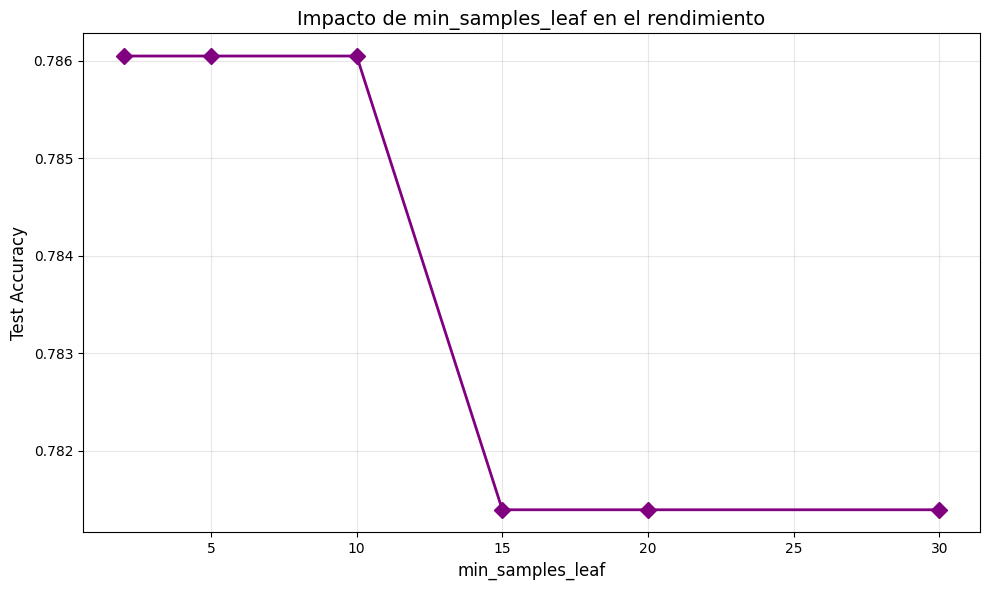

In [30]:
# Después de encontrar el mejor max_depth y min_samples_split
best_depth = best_depth_e
best_min_samples_split = best_min_split_e

# Probar diferentes valores de min_samples_leaf
min_samples_leaf_values = [2, 5, 10, 15, 20, 30]
test_scores_msl = []

print("PROBANDO min_samples_leaf")

for min_leaf in min_samples_leaf_values:
    dt = DecisionTreeClassifier(
        max_depth=best_depth,
        min_samples_split=best_min_samples_split,
        min_samples_leaf=min_leaf,
        random_state=42,
        criterion='entropy'
    )
    dt.fit(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    test_scores_msl.append(test_score)
    print(f"min_samples_leaf={min_leaf:3d} → Test Accuracy: {test_score:.4f}")

# Mejor valor
best_min_leaf_e = min_samples_leaf_values[test_scores_msl.index(max(test_scores_msl))]
print(f"\nMejor min_samples_leaf: {best_min_leaf_e}")
print(f"Mejor Test Accuracy: {max(test_scores_msl):.4f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, test_scores_msl, 'D-',
         linewidth=2, markersize=8, color='purple')
plt.xlabel('min_samples_leaf', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Impacto de min_samples_leaf en el rendimiento', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Comparacion `gini` vs `entropy`

In [31]:
print(f"Mejor max_depth para gini: {best_depth_g}")
print(f"Mejor min_samples_split para gini: {best_min_split_g}" )
print(f"Mejor min_samples_leaf para gini: {best_min_leaf_g}")
print(f"\nMejor max_depth para entropy: {best_depth_e}")
print(f"Mejor min_samples_split para entropy: {best_min_split_e}" )
print(f"Mejor min_samples_leaf para entropy: {best_min_leaf_e}")


# Comparar gini vs entropy

dtg = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_leaf_e, criterion='gini',random_state=42)
dtg.fit(X_train, y_train)
score = dtg.score(X_test, y_test)
print(f"\ncriterion='gini'→ Test: {score:.4f}")

dte = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_samples_split,min_samples_leaf=5,criterion='entropy',random_state=42)
dte.fit(X_train, y_train)
score = dte.score(X_test, y_test)
print(f"criterion='entropy' → Test: {score:.4f}")



Mejor max_depth para gini: 2
Mejor min_samples_split para gini: 2
Mejor min_samples_leaf para gini: 15

Mejor max_depth para entropy: 2
Mejor min_samples_split para entropy: 2
Mejor min_samples_leaf para entropy: 2

criterion='gini'→ Test: 0.7860
criterion='entropy' → Test: 0.7860


### Matriz de Confusion `gini` vs `entropy` usando los "Best Value"

Métricas Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       126
           1       0.91      0.55      0.69        89

    accuracy                           0.79       215
   macro avg       0.83      0.76      0.76       215
weighted avg       0.82      0.79      0.78       215

Accuracy Árbol: 0.7906976744186046


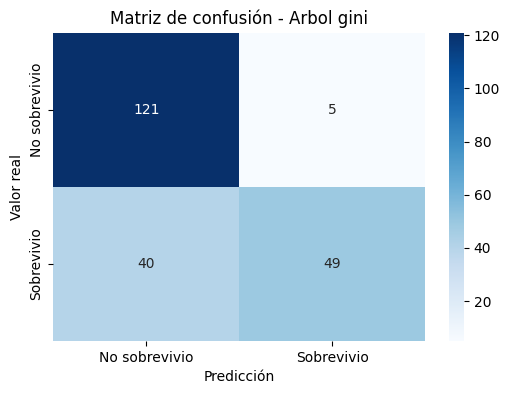

Métricas Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       126
           1       0.91      0.54      0.68        89

    accuracy                           0.79       215
   macro avg       0.83      0.75      0.76       215
weighted avg       0.81      0.79      0.77       215

Accuracy Árbol: 0.786046511627907


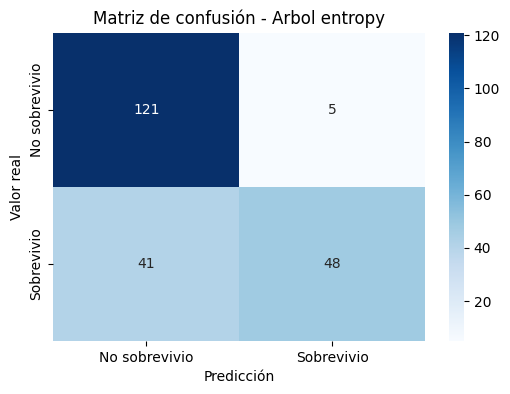

In [32]:
treeg = DecisionTreeClassifier(criterion='gini', max_depth=best_depth_g, min_samples_split=best_min_split_g, min_samples_leaf=best_min_leaf_g, random_state=42)
treeg.fit(X_train, y_train)
y_pred_treeg = treeg.predict(X_test)

print("Métricas Árbol de Decisión:")
print(classification_report(y_test, y_pred_treeg))

print("Accuracy Árbol:", accuracy_score(y_test, y_pred_treeg))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_treeg), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivio", "Sobrevivio"], yticklabels=["No sobrevivio", "Sobrevivio"])
plt.title("Matriz de confusión - Arbol gini")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()




treee = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth_e, min_samples_split=best_min_split_e, min_samples_leaf=best_min_leaf_e, random_state=42)
treee.fit(X_train, y_train)
y_pred_treee = treee.predict(X_test)

print("Métricas Árbol de Decisión:")
print(classification_report(y_test, y_pred_treee))

print("Accuracy Árbol:", accuracy_score(y_test, y_pred_treee))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_treee), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivio", "Sobrevivio"], yticklabels=["No sobrevivio", "Sobrevivio"])
plt.title("Matriz de confusión - Arbol entropy")
plt.ylabel("Valor real")
plt.xlabel("Predicción")
plt.show()


### Visualización del Árbol de Decisión

#### Modelo `gini`

Parámetros del árbol:
criterion: gini
max_depth: 2
min_samples_split: 2
min_samples_leaf: 15
Accuracy Árbol: 0.7906976744186046


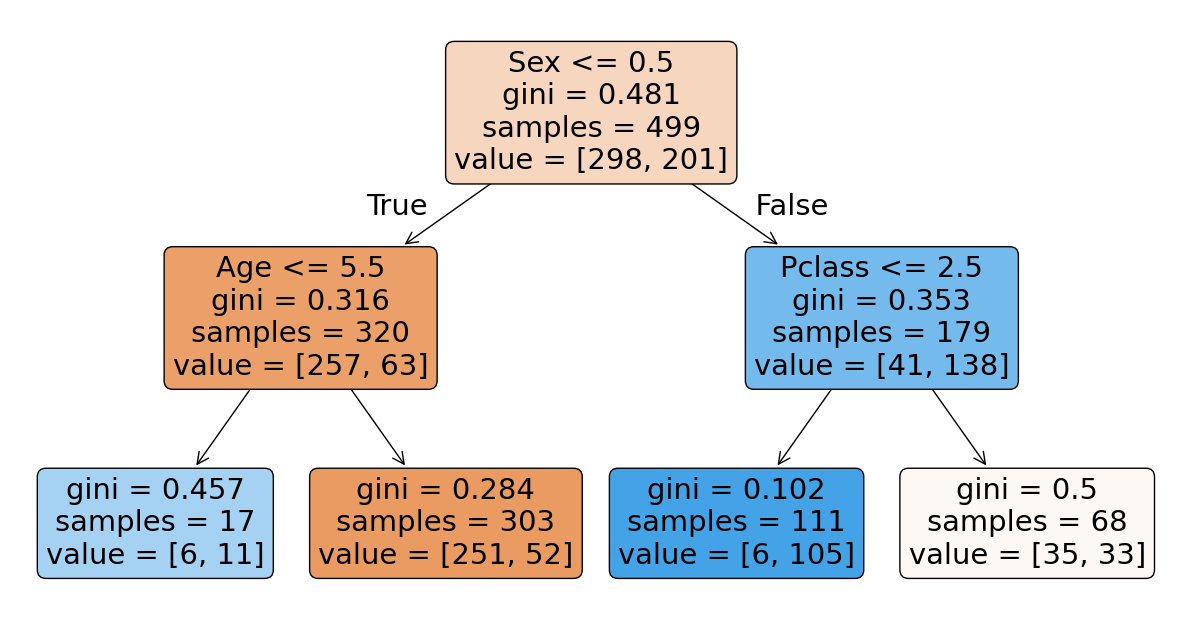

In [33]:
treeg = DecisionTreeClassifier(criterion='gini', max_depth=best_depth_g, min_samples_split=best_min_split_g, min_samples_leaf=best_min_leaf_g, random_state=42)
treeg.fit(X_train, y_train)
y_pred_treeg = treeg.predict(X_test)


print("Parámetros del árbol:")
print(f"criterion: {treeg.criterion}")
print(f"max_depth: {treeg.max_depth}")
print(f"min_samples_split: {treeg.min_samples_split}")
print(f"min_samples_leaf: {treeg.min_samples_leaf}")
print("Accuracy Árbol:", accuracy_score(y_test, y_pred_treeg))

plt.figure(figsize=(15,8))
plot_tree(treeg, feature_names=X.columns, filled=True, rounded=True)
plt.show()

#### Modelo `entropy`

Parámetros del árbol:
criterion: entropy
max_depth: 2
min_samples_split: 2
min_samples_leaf: 2
Accuracy Árbol: 0.786046511627907


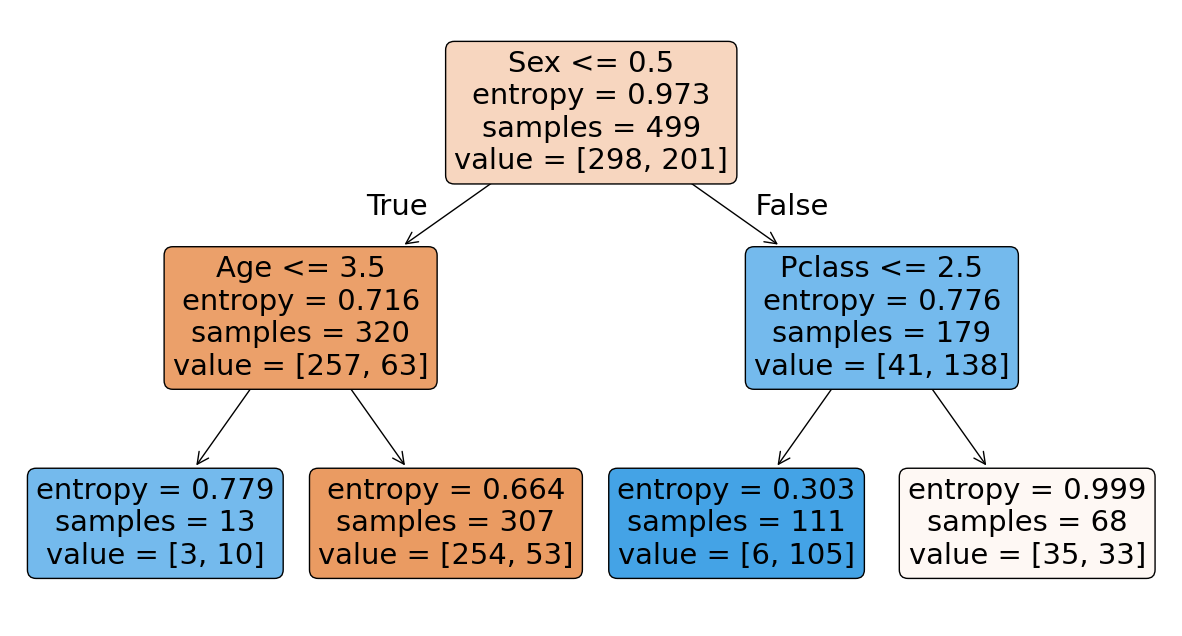

In [34]:
treee = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth_e, min_samples_split=best_min_split_e, min_samples_leaf=best_min_leaf_e, random_state=42)
treee.fit(X_train, y_train)
y_pred_treee = treee.predict(X_test)

print("Parámetros del árbol:")
print(f"criterion: {treee.criterion}")
print(f"max_depth: {treee.max_depth}")
print(f"min_samples_split: {treee.min_samples_split}")
print(f"min_samples_leaf: {treee.min_samples_leaf}")
print("Accuracy Árbol:", accuracy_score(y_test, y_pred_treee))


plt.figure(figsize=(15,8))
plot_tree(treee, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### ANÁLISIS COMPARATIVO: GINI vs ENTROPY

#### Rendimiento General (Accuracy)

**Modelo Gini (mejor):**
- Accuracy: **0.7907** (79.07%)
- Configuración: max_depth=2, min_samples_leaf=15

**Modelo Entropy:**
- Accuracy: **0.7860** (78.60%)
- Configuración: max_depth=2, min_samples_leaf=2

**Conclusión:** El modelo con criterio Gini supera ligeramente a Entropy por **0.47 puntos porcentuales**.

---

## Análisis por Clase

| Métrica | Clase | Gini | Entropy | Diferencia |
|---------|-------|------|---------|------------|
| **Precision** | 0 (negativa) | 0.75 | 0.75 | Empate |
| **Precision** | 1 (positiva) | 0.91 | 0.91 | Empate |
| **Precision** | macro avg | 0.83 | 0.83 | Empate |
| **Precision** | weighted avg | 0.82 | 0.81 | Gini +0.01 |
| **Recall** | 0 (negativa) | 0.96 | 0.96 | Empate |
| **Recall** | 1 (positiva) | 0.55 | 0.54 | Gini +0.01 |
| **Recall** | macro avg | 0.76 | 0.75 | Gini +0.01 |
| **Recall** | weighted avg | 0.79 | 0.79 | Empate |
| **F1-Score** | 0 (negativa) | 0.84 | 0.84 | Empate |
| **F1-Score** | 1 (positiva) | 0.69 | 0.68 | Gini +0.01 |
| **F1-Score** | macro avg | 0.76 | 0.76 | Empate |
| **F1-Score** | weighted avg | 0.78 | 0.77 | Gini +0.01 |

**Observaciones:**
- **Precision alta (0.91)** en clase positiva: cuando el modelo predice "1", acierta el 91% de las veces
- **Recall bajo (0.55)** en clase positiva: solo detecta el 55% de los casos positivos reales
- Existe un **desbalance** hacia la clase 0, el modelo es más conservador prediciendo la clase 1

- **Clase 0:** F1=0.84 → excelente balance
- **Clase 1:** F1=0.69 → moderado, limitado por bajo recall

El **weighted average F1=0.78** refleja un desempeño global aceptable pero con margen de mejora en la detección de la clase positiva.

---


## Análisis de parámetros

### `max_depth` (Profundidad del árbol)

**Observación crítica:** Ambos modelos muestran **overfitting en valores altos**:

```
max_depth=2  → Train: 0.8096, Test: 0.7860  MEJOR (diferencia: 2.36%)
max_depth=10 → Train: 0.9339, Test: 0.7814  Overfitting (diferencia: 15.25%)
max_depth=20 → Train: 0.9459, Test: 0.7814  Overfitting (diferencia: 16.45%)
```

**Conclusión:** max_depth=2 es óptimo, evita sobreajuste y mantiene buena generalización.

### `min_samples_split`

**Sin impacto significativo:** Todos los valores (2-50) mantienen accuracy constante en 0.7860.

**Razón:** Con max_depth=2, el árbol es tan simple que este parámetro no afecta la estructura final.

### `min_samples_leaf` (diferenciador clave)

**Modelo Gini:**
```
min_samples_leaf=1-10  → 0.7860
min_samples_leaf=15-20 → 0.7907 MEJOR (+0.47%)
min_samples_leaf=30    → 0.7814 (empeora)
```

**Modelo Entropy:**
```
min_samples_leaf=2-10  → 0.7860 MEJOR
min_samples_leaf=15-30 → 0.7814 (empeora)
```

---

## Precision vs Recall

El modelo prioriza **Precision sobre Recall** en la clase positiva:

- **Alta Precision (0.91):** minimiza falsos positivos → cuando dice "sí", casi siempre acierta
- **Bajo Recall (0.55):** muchos falsos negativos → se pierde casi la mitad de casos positivos

**Implicación práctica:** Depende del contexto:
- Si el costo de **falsos positivos** es alto → modelo adecuado
- Si necesitas **detectar todos los casos positivos** → deberías ajustar el umbral de decisión o rebalancear clases

---

## 5. RECOMENDACIONES FINALES

**Modelo recomendado:** **Gini con max_depth=2, min_samples_leaf=15**

**Justificación:**
1. Mejor accuracy (0.7907)
2. Mejor recall en clase positiva (0.55 vs 0.54)
3. Mayor regularización previene overfitting
4. Modelo más simple y interpretable

**Posibles mejoras:**
1. **Ajustar class_weight='balanced'** para mejorar recall en clase minoritaria
2. **Probar GridSearchCV** con combinaciones de parámetros
3. **Analizar umbrales de probabilidad** para optimizar precision-recall trade-off
4. **Feature engineering** para mejorar el poder predictivo
5. Considerar **ensemble methods** (Random Forest, XGBoost) si se requiere mayor accuracy

---

## F1-Score



---

## Resumen

| Aspecto | Conclusión |
|---------|-----------|
| **Mejor modelo** | Gini (max_depth=2, min_samples_leaf=15) |
| **Accuracy** | 79.07% |
| **Fortaleza** | Alta precisión en clase positiva (91%) |
| **Debilidad** | Bajo recall en clase positiva (55%) |
| **Overfitting** | Controlado con max_depth=2 |
| **Siguiente paso** | Balancear clases o ajustar threshold |




